# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Mehran Morabi Pazoki
2.   Student Number: 400201661


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
ap=pd.merge(artists,plays, left_on='id', right_on='artistID')


In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap.drop(['id'],axis=1,inplace=True)
ap.reset_index(inplace=True)

In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = pd.DataFrame(columns=['name','totalUniqueUsers','totalArtistPlays']).set_index('name')
artist_rank['totalUniqueUsers']=ap.groupby(['name']).count()['userID']
artist_rank['totalArtistPlays']=ap.groupby(['name']).sum()['playCount']
artist_rank['avgUserPlays'] = ap.groupby(['name']).mean()['playCount']
artist_rank.sort_values(by='totalArtistPlays',ascending=False,inplace=True)

In [8]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
ap = pd.merge(ap,artist_rank,on='name').sort_values(by='playCount',ascending=False)

In [10]:
ap.head(20)

,index,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,27302,U2,1094,511,320725,185,493024,2664.994595
8152,8152,Blur,1905,203,257978,114,318221,2791.412281
26670,26670,Paramore,1664,498,227829,399,963449,2414.659148
21191,21191,Evanescence,1146,378,203165,226,513476,2272.017699
14165,14165,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,33309,Shakira,1983,701,172496,319,688529,2158.398119
33127,33127,Shakira,757,701,169596,319,688529,2158.398119
31835,31835,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

C:\Users\mehra\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


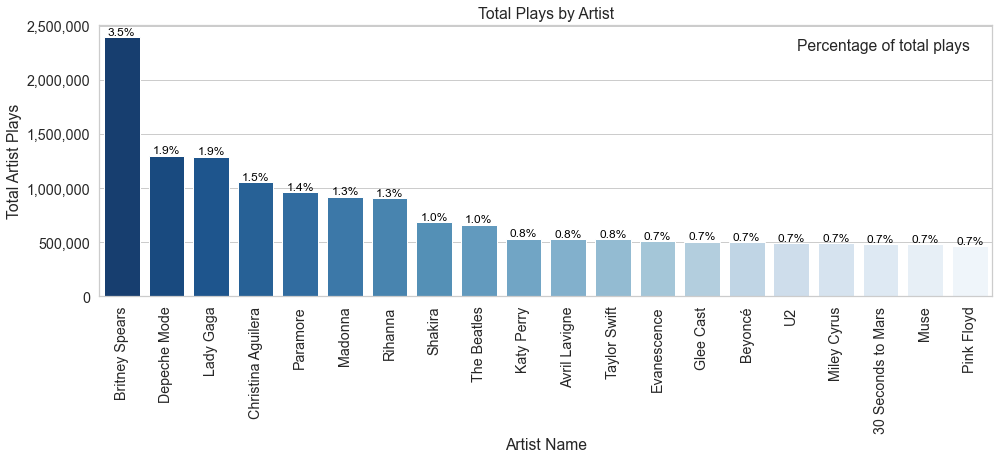

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

C:\Users\mehra\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


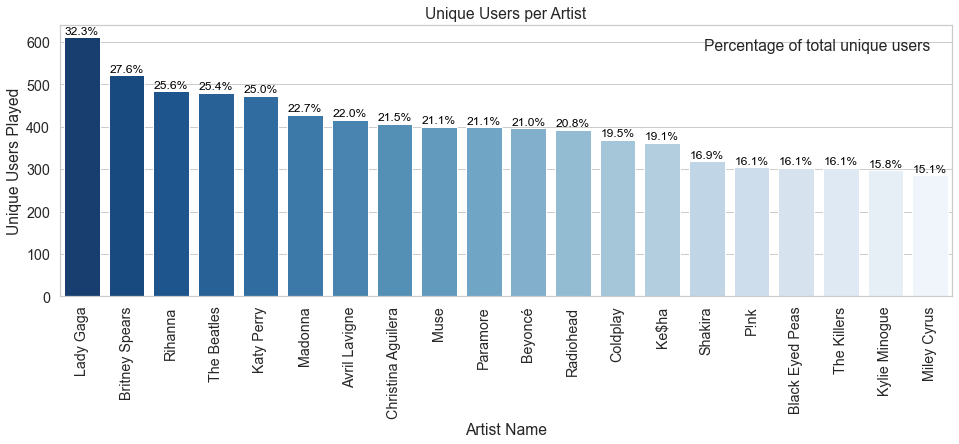

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

C:\Users\mehra\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


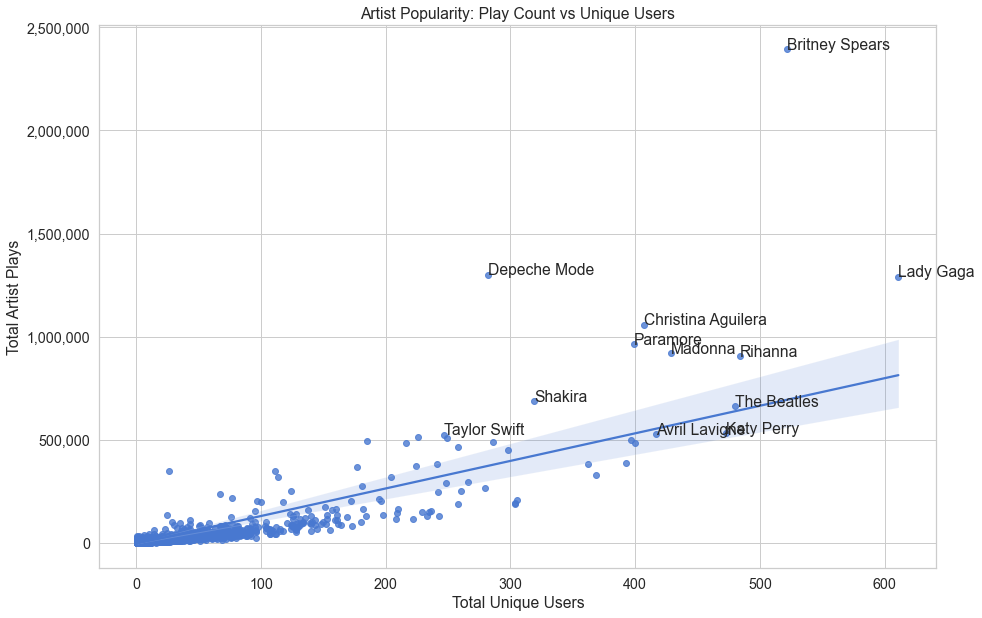

In [14]:
top_artists = artist_rank.head(12).index # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers'] # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays']  # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [16]:
ap

,index,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,35843,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,27302,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,8152,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,26670,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,38688,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,32955,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,71811,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,91319,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [17]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot(index='userID',columns='artistID',values='playCountScaled')

In [18]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings = ratings_df.fillna(value=0).values

In [20]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
A=ratings.copy()
A[A>0]=1
print("percent of sparsity is {v:0.3f}".format(v=A.mean()*100))
## END

percent of sparsity is 0.276


# Fitting(Training) Model (50pts)

In [21]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    validation=np.zeros_like(ratings)
    train=np.zeros_like(ratings)
    for i in range(len(ratings)):
        index=np.where(ratings[i]!=0)[0]
        rated=ratings[i][index]
        if len(index)>= MIN_USER_RATINGS:
            A=np.arange(len(index))
            np.random.shuffle(A)
            validation_index=A[0:DELETE_RATING_COUNT]
            train_index=A[DELETE_RATING_COUNT::]
            validation[i][index[validation_index]]=rated[validation_index]
            train[i][index[train_index]]=rated[train_index]
        else :
            train[i]=ratings[i]
            
    return train, validation

In [22]:
train, val = train_test_split(ratings)

In [23]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[np.where(ground_truth!=0)]
    ground_truth = ground_truth[np.where(ground_truth!=0)]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [24]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    self.Loss_train=[]
    self.Loss_validation=[]    
    
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return P @ Q

  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration

    n_user,n_item=X_train.shape
    P=np.random.randn(n_user,self.n_latent_features)
    Q=np.random.randn(self.n_latent_features,n_item)

    for i in range(self.n_epochs):
      E=X_train-self.predictions(P,Q)
      E[np.where(X_train==0)]=0 # make zero error for unobserved ratings
      self.Loss_train.append(rmse(self.predictions(P,Q),X_train)) # self.lmbda*(np.sum(P.T @ P) + np.sum(Q.T @ Q)
      print(f"epoch {i} train Loss is {self.Loss_train[-1]}")
      # Update param
      Q_next=Q + self.learning_rate*(P.T @ E - self.lmbda*Q)
      P_next=P + self.learning_rate*(E @ Q.T- self.lmbda*P)


      P=P_next
      Q=Q_next
      # validation
      self.Loss_validation.append(rmse(self.predictions(P,Q),X_val))
      print(f"epoch {i} Validation Loss is {self.Loss_validation[-1]}")
      print("#######################################################")
    self.P=P
    self.Q=Q

    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    predictions_index = np.where(train[user_index, :] == 0)[0]
    res=self.P @ self.Q
    return res[user_index,predictions_index]
    

In [25]:
#creating recommender object
recommender = Recommender().fit(train, val)

epoch 0 train Loss is 1.7202618862058539
epoch 0 Validation Loss is 1.561009235613381
#######################################################
epoch 1 train Loss is 1.5622531434439841
epoch 1 Validation Loss is 1.4567004283018734
#######################################################
epoch 2 train Loss is 1.4463044948022061
epoch 2 Validation Loss is 1.3747898635190492
#######################################################
epoch 3 train Loss is 1.3543464987336797
epoch 3 Validation Loss is 1.3071872994736364
#######################################################
epoch 4 train Loss is 1.277953631621399
epoch 4 Validation Loss is 1.2495482565170037
#######################################################
epoch 5 train Loss is 1.212545649961946
epoch 5 Validation Loss is 1.199279350512051
#######################################################
epoch 6 train Loss is 1.1553542559186771
epoch 6 Validation Loss is 1.154706036459968
#######################################################
epoc

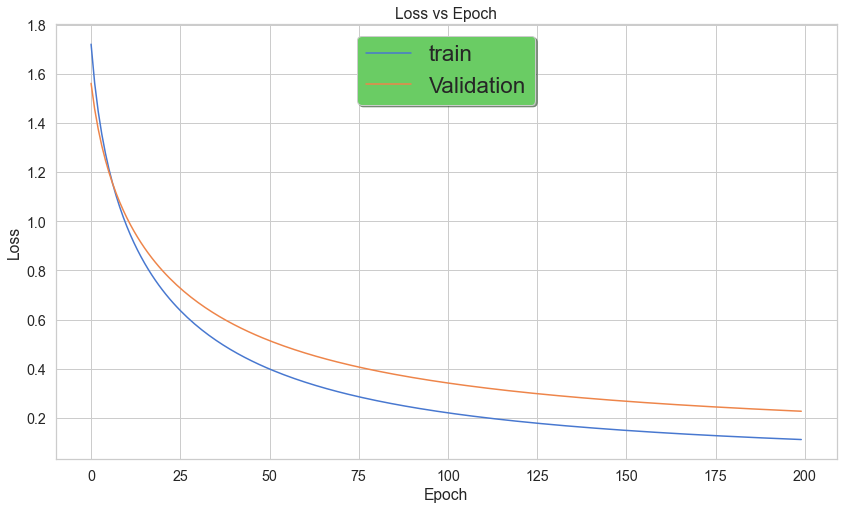

In [26]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
fig, ax = plt.subplots()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','Validation'])
ax.plot(np.arange(200),recommender.Loss_train,label='train')
ax.plot(np.arange(200),recommender.Loss_validation,label='Validation')
legend=ax.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C2')
plt.show()
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

برای افزایش دقت و سرعت همگرایی از روش کاهش گرادیان با ممان استفاده میکنیم تا بتوانیم از کمینه های محلی عبور کرده و به کمینه های 
کلی همگرا شویم وبا استفاده از نرخ آموزش کاهشی نیز روند همگرایی را بهبود ببخشیم
 همچمنین با تغییر مقدار دهی اولیه از گوسی به توزیع یونیفرم توانستیم مقدار بایاس تابع هزینه را کم کنیم 

In [35]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001*4):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    self.Loss_train=[]
    self.Loss_validation=[]    
    
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    return P @ Q

  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration

    n_user,n_item=X_train.shape
    # P=np.hstack((np.random.randn(n_user,self.n_latent_features),np.ones(shape=(n_user,1))))
    # Q=np.vstack((np.ones(shape=(1,n_item)),np.random.randn(self.n_latent_features,n_item)))
    P=np.random.rand(n_user,self.n_latent_features)
    Q=np.random.rand(self.n_latent_features,n_item)
    gradP=[0]
    gradQ=[0]
    alpha=0.9
    for i in range(self.n_epochs):
      E=X_train-self.predictions(P,Q)
      E[np.where(X_train==0)]=0 # make zero error for unobserved ratings
      self.Loss_train.append(rmse(self.predictions(P,Q),X_train)) # self.lmbda*(np.sum(P.T @ P) + np.sum(Q.T @ Q)
      print(f"epoch {i} train Loss is {self.Loss_train[-1]}")
      # Update param
      deltaP= gradP[-1]*alpha + self.learning_rate*(E @ Q.T- self.lmbda*P)
      deltaQ= gradQ[-1]*alpha + self.learning_rate*(P.T @ E - self.lmbda*Q)
      Q_next=Q + deltaQ
      P_next=P + deltaP
      gradP.append(deltaP)
      gradQ.append(deltaQ)
      # P_next[:,-1] = 1.0
      # Q_next[0,:] = 1.0
      P=P_next
      Q=Q_next
      if i % 40 ==0 and i:
        self.learning_rate=self.learning_rate / 2
      # validation
      self.Loss_validation.append(rmse(self.predictions(P,Q),X_val))
      print(f"epoch {i} Validation Loss is {self.Loss_validation[-1]}")
      print(f"Learning rate is {self.learning_rate}")
      print("#######################################################")
    

    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    pass

In [36]:
recommender_opt = Recommender().fit(train, val)

epoch 0 train Loss is 0.8430208948765562
epoch 0 Validation Loss is 0.6361335068407733
Learning rate is 0.004
#######################################################
epoch 1 train Loss is 0.6347472487821318
epoch 1 Validation Loss is 0.47161982441900185
Learning rate is 0.004
#######################################################
epoch 2 train Loss is 0.4625682082737402
epoch 2 Validation Loss is 0.34397221415373425
Learning rate is 0.004
#######################################################
epoch 3 train Loss is 0.3325414263800916
epoch 3 Validation Loss is 0.22162141114758424
Learning rate is 0.004
#######################################################
epoch 4 train Loss is 0.2126384396136853
epoch 4 Validation Loss is 0.13394827768150078
Learning rate is 0.004
#######################################################
epoch 5 train Loss is 0.13248647642191191
epoch 5 Validation Loss is 0.16837479741715541
Learning rate is 0.004
######################################################

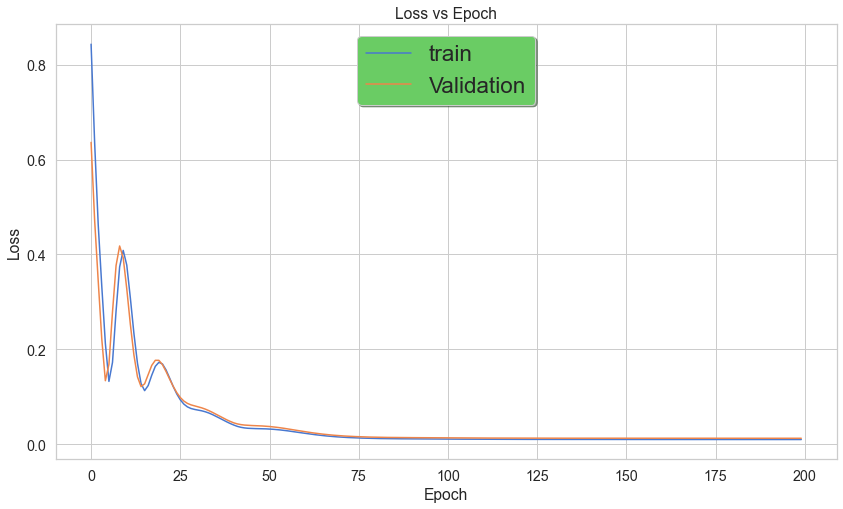

In [37]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
fig, ax = plt.subplots()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','Validation'])
ax.plot(np.arange(200),recommender_opt.Loss_train,label='train')
ax.plot(np.arange(200),recommender_opt.Loss_validation,label='Validation')
legend=ax.legend(loc='upper center', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C2')
plt.show()
#TODO

# Making recommendations

In [38]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [39]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [40]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [41]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,2307,Zülfü Livaneli,0.312840
1,4579,Lady Gaga VS Christina Aguilera,0.268721
2,6457,The Abbey School Choir,0.262799
3,10010,Camerata Mediolanense,0.259115
4,10987,Brodka,0.258572
5,11035,Tower of Rome,0.258297
6,11409,Radio Killer,0.255343
7,13928,Enoch Light,0.250961
8,17417,Gordon Hempton,0.249942
9,18009,Kubb,0.244794


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**

Text(0.5, 0, 'Latent feature axis 3')

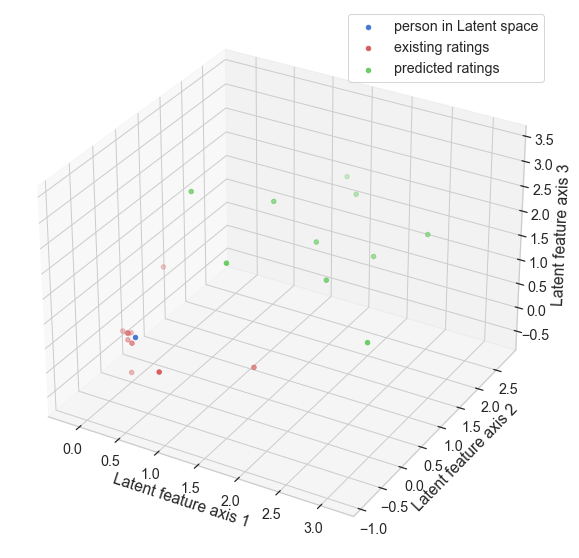

In [65]:

user=recommender.P
artist=recommender.Q
A=create_artist_ratings(artists, existing_ratings_index, existing_ratings).head(10)
B=create_artist_ratings(artists, predictions_index, rating_predictions).head(10)

ax = plt.figure(figsize=(15,10)).add_subplot(projection='3d')

ax.scatter(user[user_index,0], user[user_index,1],user[user_index,2],c='b')
art_indx=list(A.id)
idx=[]
for i in art_indx:
    idx.append(np.where(ratings_df.columns==i))
ax.scatter(artist[0,idx],artist[1,idx],artist[2,idx],c='r')
idx=[]
art_indx=list(B.id)
for i in art_indx:
    idx.append(np.where(ratings_df.columns==i))
ax.scatter(artist[0,idx],artist[1,idx],artist[2,idx],c='g')
    
ax.legend(['person in Latent space','existing ratings','predicted ratings'])

ax.set_xlabel('Latent feature axis 1')
ax.set_ylabel('Latent feature axis 2')
ax.set_zlabel('Latent feature axis 3')